In [ ]:
#Keven Disen 111433335
#Final Project 2 Question 2


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from PIL import Image


In [46]:
df=pd.read_csv('test.csv')
emotionsTest=df.emotion
images_flattened = df.pixels

# OK, now process all images to make all of them into numpy array to store 48x48 images
image=np.array(pd.Series(images_flattened[0].split()).map(lambda x: int(x))).reshape(1,48,48)

for i in range(1,len(images_flattened)):
    image_next = np.array(pd.Series(images_flattened[i].split()).map(lambda x: int(x))).reshape(1,48,48)
    image=np.vstack([image,image_next])
    
Xtest = image


In [47]:
Xtrain = np.load('np_training_data.npy')
df=pd.read_csv('facial_expression.csv') 
emotions=df.emotion
ytrain = np.array(emotions)

#print(df)
#print(Xtrain.shape)

dataset_size = len(Xtrain)
Xtrain = Xtrain.reshape(dataset_size,-1)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(Xtrain,ytrain ,test_size = 0.3, random_state=40)

#print(X_train.shape, X_test.shape)
#print(y_train.shape, y_test.shape)


In [49]:
#Used Random Forest for Accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rF = RandomForestClassifier(n_estimators=100,
                            criterion='gini',
                            max_depth=None,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_features='auto',
                            max_leaf_nodes=None,
                            min_weight_fraction_leaf=0.0,
                            random_state=None)  


rF.fit(X_train, y_train)
y_pred = rF.predict(X_test)
expected = y_test
accR = accuracy_score(expected, y_pred)
#Accuracy of algorithm
print("Accuracy score using Random Forest", accR*100)




Accuracy score using Random Forest 43.01315462894018


In [50]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(expected, y_pred)
confusion
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame (confusion)
figure = plt.figure(figsize=(6,5))  
axes = sns.heatmap (confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r)

axes.set_ylim(sorted(axes.get_xlim(), reverse=True))

(6.0, 0.0)

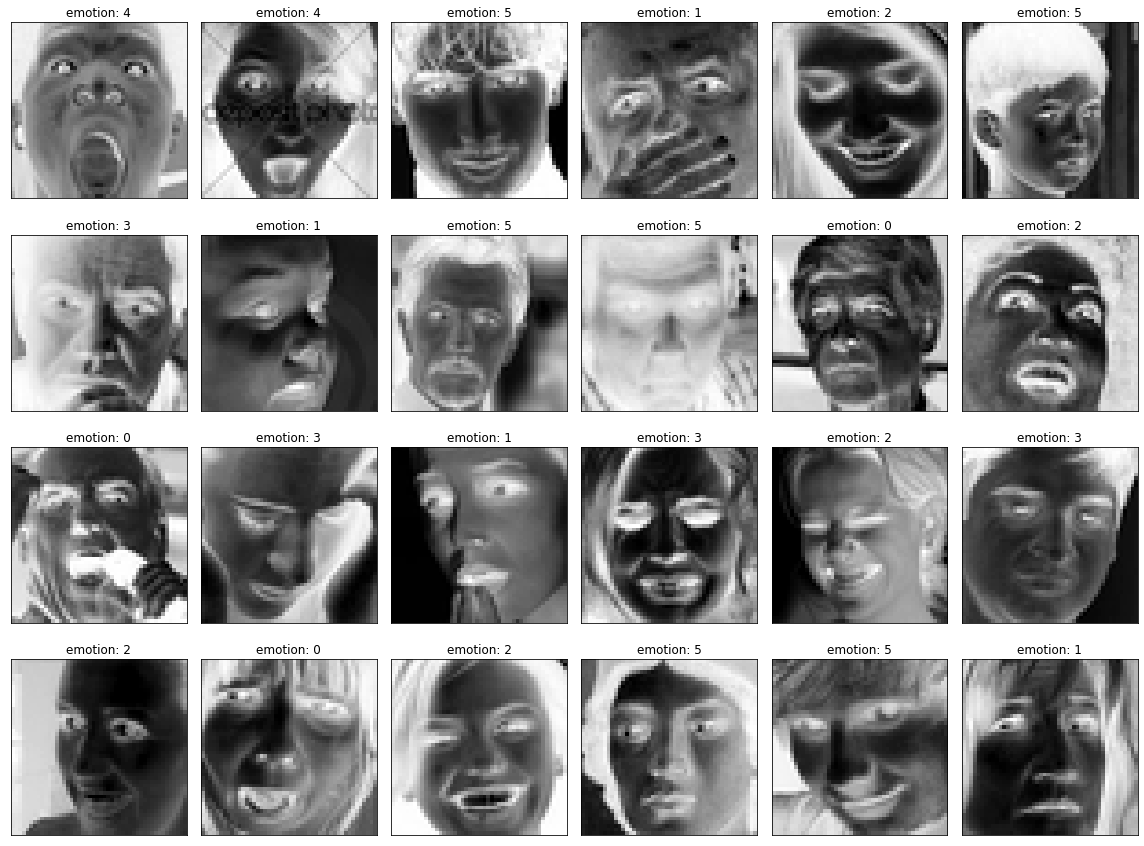

In [54]:
#Plotting Pictures and their emotion

import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for item in zip(axes.ravel(), Xtest, emotionsTest):
    axes, image, target = item 
    axes.imshow(image, cmap=plt.cm.gray_r) # Color map plt.cm.gray_r is for grayscale with 0 for white
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'emotion: {target}')
plt.tight_layout()